### Задание 1: Использование основных типов графиков.
Используйте набор данных о продажах автомобилей (https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho) и создайте различные типы графиков, чтобы отобразить различные аспекты данных. 
Включите 
- столбчатые диаграммы, 
- гистограммы, 
- линейные графики, 
- диаграммы размаха
- ящик с усами
- радиальные диаграммы
- scatter plot.

In [2]:
import pandas as pd

car_ds = pd.read_csv("data/car_details.csv")
car_ds

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


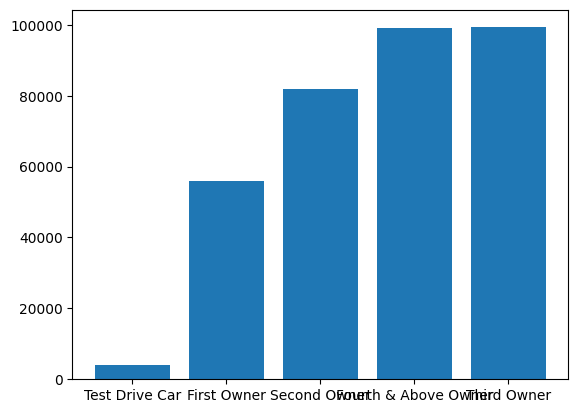

In [3]:
import matplotlib.pyplot as plt

avg_km = car_ds.groupby('owner')['km_driven'].mean().sort_values()

owners = avg_km.index
km_values = avg_km.values

plt.bar(owners, km_values)
plt.show()

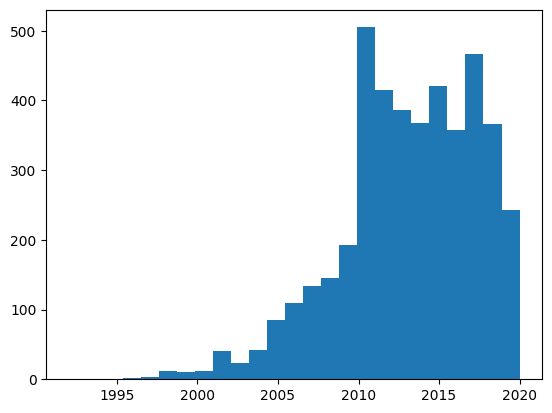

In [83]:
plt.hist(car_ds['year'], bins=25)
plt.show()

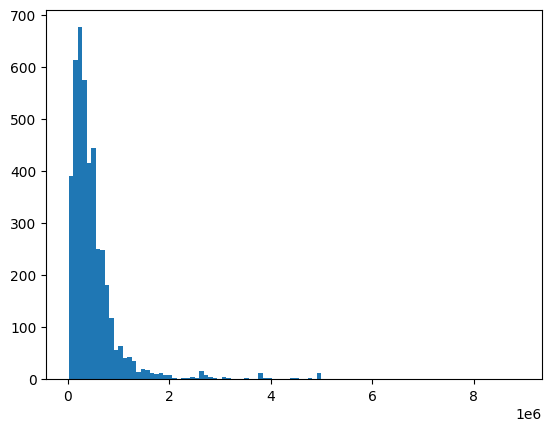

In [84]:
plt.hist(car_ds['selling_price'], bins=100)
plt.show()

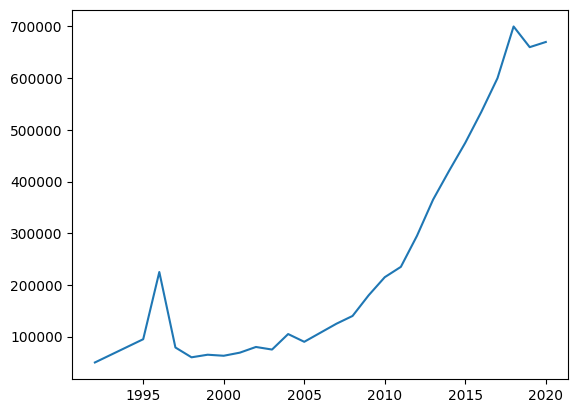

In [89]:
avg_price = car_ds.groupby('year')['selling_price'].median()
plt.plot(avg_price.index, avg_price .values)
plt.show()

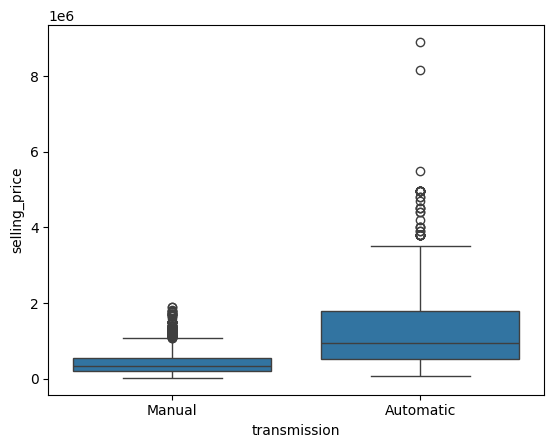

In [85]:
import seaborn as sns
sns.boxplot(x='transmission', y='selling_price', data=car_ds)
plt.show()

<Axes: xlabel='selling_price', ylabel='Count'>

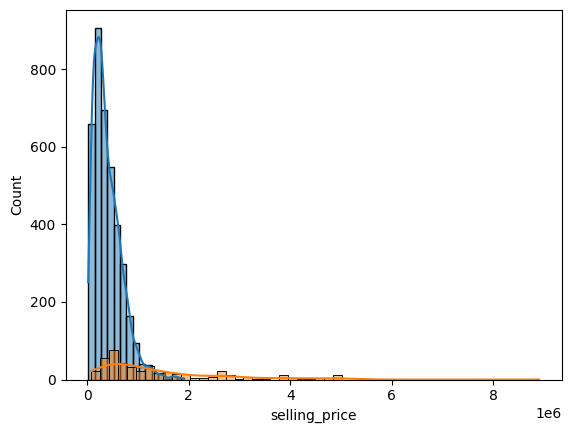

In [50]:
sns.histplot(car_ds[car_ds['transmission'] == 'Manual']['selling_price'], bins=15, kde=True)
sns.histplot(car_ds[car_ds['transmission'] == 'Automatic']['selling_price'], bins=50, kde=True)

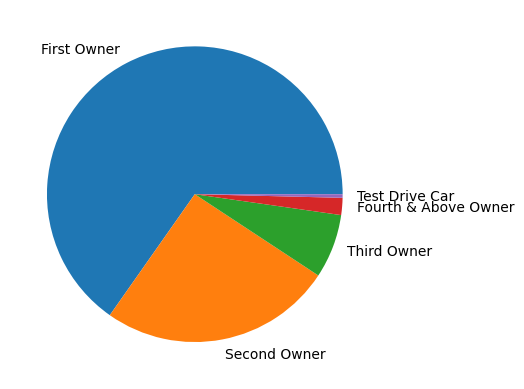

In [86]:
owner_counts = car_ds['owner'].value_counts()
owner_counts
plt.pie(owner_counts, labels = owner_counts.index)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_11928\2968304385.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_car_ds = car_ds[car_ds["km_driven"] < 40000][car_ds["selling_price"] < 5000000]


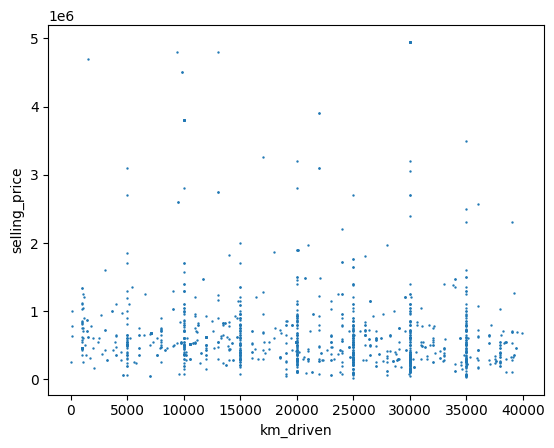

In [ ]:
new_car_ds = car_ds[car_ds["km_driven"] < 40000][car_ds["selling_price"] < 5000000]
plt.scatter(new_car_ds["km_driven"], new_car_ds["selling_price"], s=0.5)
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.show()

### Задание 2: Создание тепловой карты корреляции.
Используйте набор данных о погоде https://www.kaggle.com/selfishgene/historical-hourly-weather-data и с помощью библиотеки seaborn создайте тепловую карту, чтобы отобразить корреляцию между различными параметрами погоды.

In [113]:
temperature = pd.read_csv('data/weather/temperature.csv')
humidity = pd.read_csv('data/weather/humidity.csv')
pressure = pd.read_csv('data/weather/pressure.csv')
wind_speed = pd.read_csv('data/weather/wind_speed.csv')
print(temperature)
print(humidity)
print(pressure)
print(wind_speed)

                  datetime   Vancouver    Portland  San Francisco     Seattle  \
0      2012-10-01 12:00:00         NaN         NaN            NaN         NaN   
1      2012-10-01 13:00:00  284.630000  282.080000     289.480000  281.800000   
2      2012-10-01 14:00:00  284.629041  282.083252     289.474993  281.797217   
3      2012-10-01 15:00:00  284.626998  282.091866     289.460618  281.789833   
4      2012-10-01 16:00:00  284.624955  282.100481     289.446243  281.782449   
...                    ...         ...         ...            ...         ...   
45248  2017-11-29 20:00:00         NaN  282.000000            NaN  280.820000   
45249  2017-11-29 21:00:00         NaN  282.890000            NaN  281.650000   
45250  2017-11-29 22:00:00         NaN  283.390000            NaN  282.750000   
45251  2017-11-29 23:00:00         NaN  283.020000            NaN  282.960000   
45252  2017-11-30 00:00:00         NaN  282.280000            NaN  283.040000   

       Los Angeles   San Di

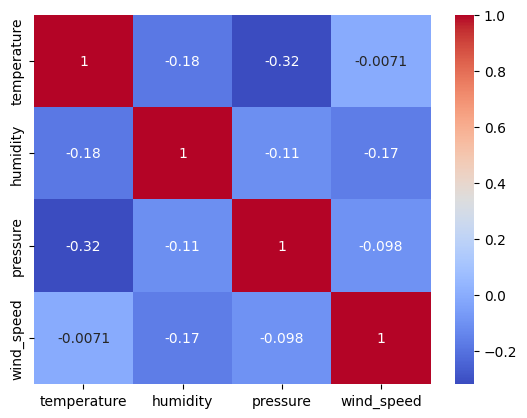

In [112]:
city = 'Minneapolis'
df = pd.DataFrame({
    'temperature': temperature[city],
    'humidity': humidity[city],
    'pressure': pressure[city],
    'wind_speed': wind_speed[city]
})

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### Задание 3: Использование plotly для создания интерактивных графиков.
Скачайте набор данных о выборах (например, https://www.kaggle.com/rohanrao/us-presidential-elections-2020) и используйте Plotly для создания интерактивных графиков, таких как интерактивные карты или диаграммы с подсказками.

In [104]:
voting = pd.read_csv('data/voting.csv')
voting

,state,state_abr,trump_pct,biden_pct,trump_vote,biden_vote,trump_win,biden_win
0,Alaska,AK,53.1,43.0,189543,153502,1,0
1,Hawaii,HI,34.3,63.7,196864,366130,0,1
2,Washington,WA,39.0,58.4,1584651,2369612,0,1
3,Oregon,OR,40.7,56.9,958448,1340383,0,1
4,California,CA,34.3,63.5,5982194,11082293,0,1
5,Idaho,ID,63.9,33.1,554128,287031,1,0
6,Montana,MT,56.9,40.6,343647,244836,1,0
7,Nevada,NV,47.7,50.1,669890,703486,0,1
8,Wyoming,WY,70.4,26.7,193559,73491,1,0
9,Utah,UT,58.2,37.7,865140,560282,1,0


In [110]:
import plotly.express as px
import numpy as np

voting['winner'] = np.where(voting['trump_win'] == 1, 'Trump', 'Biden')
voting['winner_pct'] = np.where(voting['trump_win'] == 1, voting['trump_pct'], voting['biden_pct'])
voting['color_value'] = np.where(voting['winner'] == 'Biden', voting['winner_pct'], -voting['winner_pct'])

fig = px.choropleth(
    voting,
    locations='state_abr',
    locationmode='USA-states',
    color='color_value',
    hover_name='state',
    hover_data={
        'winner': True,
        'winner_pct': True,
        'biden_pct': True,
        'trump_pct': True
    },
    color_continuous_scale=['red', 'white', 'blue'],
    range_color=[-100, 100],
    scope='usa',
    title='USA Voting Results 2020 (by winner percentage)'
)

fig.show()


### Задание 4: Создание визуализаций временных рядов.
Возьмите набор данных о COVID-19 от Джона Хопкинса (https://github.com/CSSEGISandData/COVID-19) и создайте визуализации временных рядов для показа изменения числа случаев заражения и смертей по времени.

In [114]:
confirmed = pd.read_csv('data/covid_19/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('data/covid_19/time_series_covid19_deaths_global.csv')
recovered = pd.read_csv('data/covid_19/time_series_covid19_recovered_global.csv')
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,703228,703228,703228,703228,703228,703228,703228,703228,703228,703228
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,535,535,535,535,535,535,535,535,535,535
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,11945,11945,11945,11945,11945,11945,11945,11945,11945,11945
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,343012,343012,343079,343079,343079,343135,343135,343135,343135,343135


In [115]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,4057,4057,4057,4057,4057,4057,4057,4057,4057,4057


In [116]:
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


C:\Users\user\AppData\Local\Temp\ipykernel_11928\1326136659.py:6: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



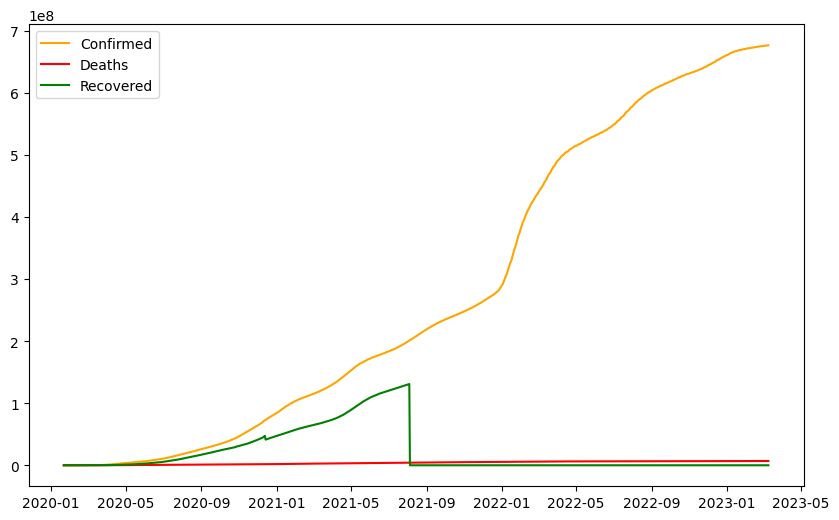

In [ ]:
world_confirmed = confirmed.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).sum()
world_deaths = deaths.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).sum()
world_recovered = recovered.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).sum()

combine = pd.DataFrame({
    'date': pd.to_datetime(world_confirmed.index),
    'confirmed': world_confirmed.values,
    'deaths': world_deaths.values,
    'recovered': world_recovered.values
})

plt.plot(combine['date'], combine['confirmed'], label='Confirmed', color='orange')
plt.plot(combine['date'], combine['deaths'], label='Deaths', color='red')
plt.plot(combine['date'], combine['recovered'], label='Recovered', color='green')
plt.legend()
plt.show()

### Задание 5: Использование географической визуализации.
С использованием набора данных о террористических атаках (https://www.kaggle.com/START-UMD/gtd) создайте географическую визуализацию для показа, где происходят террористические атаки по миру, используя библиотеку Folium или Geopandas.

In [ ]:
terrorism = pd.read_csv('data/globalterrorism.csv')
terrorism

C:\Users\user\AppData\Local\Temp\ipykernel_11928\2052410375.py:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [151]:
import folium as fl

cols = ['eventid', 'iyear', 'country_txt', 'region_txt', 'city', 'latitude', 'longitude', 
        'attacktype1_txt', 'nkill']
df = terrorism[cols].dropna(subset=['latitude', 'longitude'])

m = fl.Map()


for _, row in df.sample(1000).iterrows():
    popup = f"Country: {row['country_txt']} <br> Year: {row['iyear']} <br> Type: {row['attacktype1_txt']} <br>Died: {row['nkill']}"
    fl.CircleMarker(
        location=[row['latitude'], row['longitude']],
        popup=popup,
        radius=4
    ).add_to(m)

m.save("map.html")